## Qualification 2024-Spring Data Preprocess

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
df0 = pd.read_csv('dataset0.csv')
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')
df3 = pd.read_csv('dataset3.csv')
# Merge Data 
df_merge = pd.concat([df0.iloc[:,1:], df1.iloc[:,1:], df2.iloc[:,1:], df3.iloc[:,1:]], ignore_index = True)

### 1) Calculate the proportion of label (level)

In [8]:
level_counts = df_merge['level'].value_counts().sort_index()

# Display the counts for each level
level_counts

level
0    334065
1    132517
2      4141
3      2219
Name: count, dtype: int64

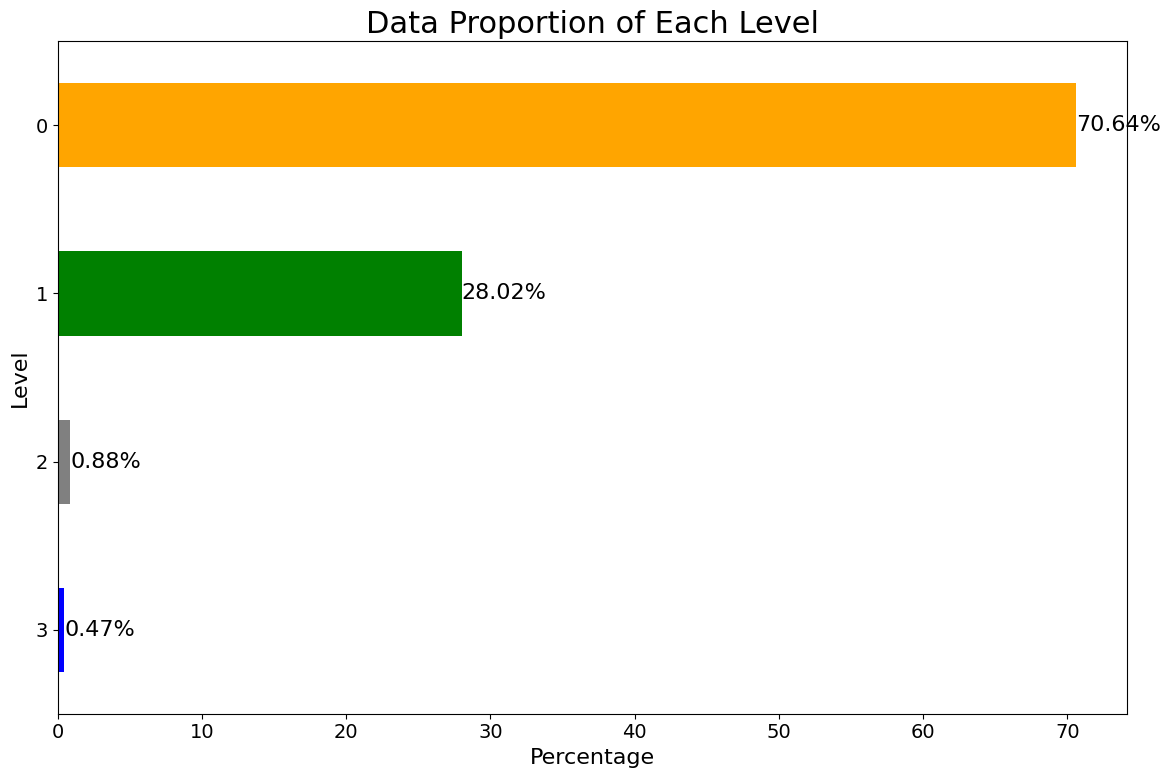

In [43]:
# Plotting the horizontal bar chart with the specified level order reversed (3, 2, 1, 0)
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'legend.fontsize': 12})

ax = level_percentages_reindexed.iloc[::-1].plot(kind='barh', color=['blue', 'grey', 'green', 'orange'])
plt.title('Data Proportion of Each Level', fontsize = 22)
plt.xlabel('Percentage', fontsize = 16)
plt.ylabel('Level', fontsize = 16)

# Adding the percentage values next to each bar, in the reversed order
for index, value in enumerate(level_percentages_reindexed.iloc[::-1]):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize = 16)  # Adjust index for reversed order|

# Adjusting layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
label_counts = df_merge['level'].value_counts(normalize=True)

In [5]:
label_counts

level
0    0.706355
1    0.280197
2    0.008756
3    0.004692
Name: proportion, dtype: float64

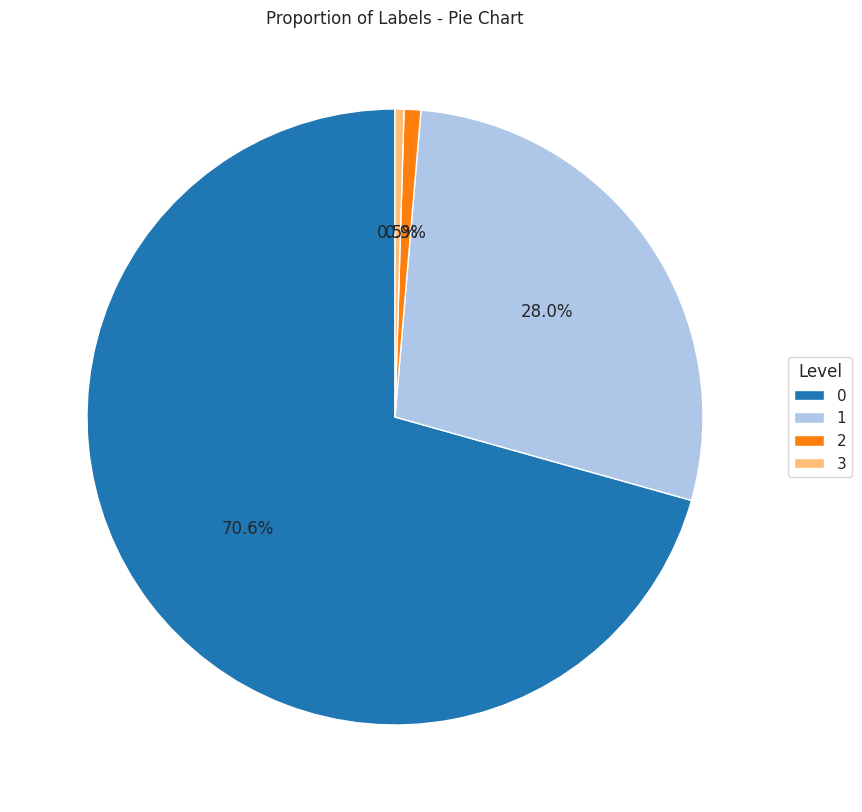

In [14]:
# Calculating the proportion of each label
label_counts = df_merge['level'].value_counts(normalize=True)

# Pie chart with improved readability
plt.figure(figsize=(10, 10))  # Adjusted figure size for better clarity
plt.pie(label_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Proportion of Labels - Pie Chart')
plt.legend(label_counts.index, title="Level", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


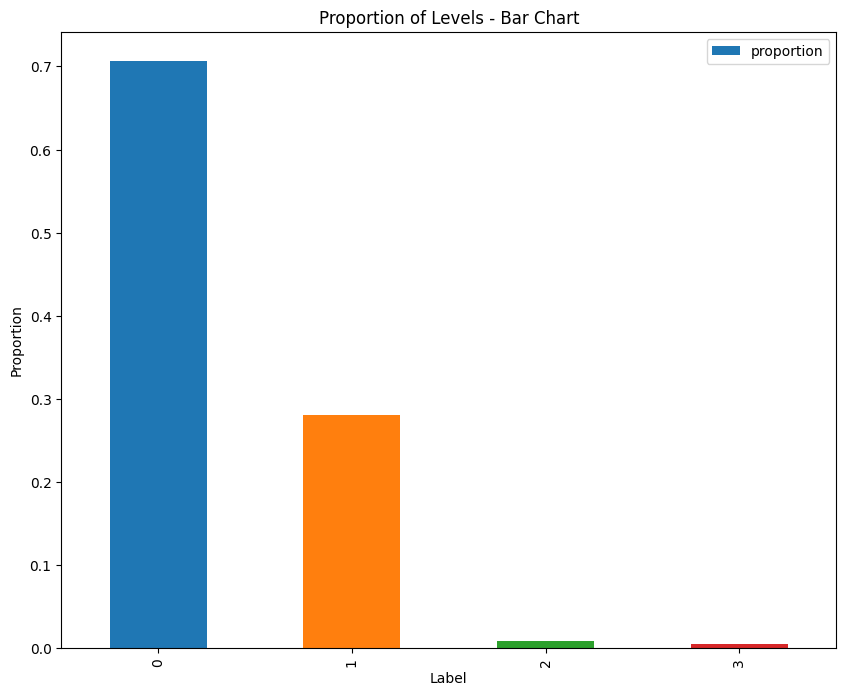

In [7]:
# Bar chart with improved readability
plt.figure(figsize=(10, 8))  # Adjust figure size as needed for clarity
label_counts.plot(kind='bar', color=plt.cm.tab10.colors)
plt.title('Proportion of Levels - Bar Chart')
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.xticks(rotation=90)  # Rotate x-tick labels to avoid overlap
plt.show()

In [ ]:
# Creating labels with percentage for the legend
legend_labels = [f'{label}: {percentage:.2f}%' for label, percentage in percentages.iteritems()]

# Enhanced bar chart with percentage values in legend
plt.figure(figsize=(12, 9))  # Adjust figure size for clarity
bars = plt.bar(label_counts.index, label_counts.values, color=plt.cm.tab10.colors)

# Creating a custom legend
plt.legend(bars, legend_labels, title="Label Percentages")

plt.title('Proportion of Levels - Enhanced Bar Chart', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=45, ha="right")  # Adjust alignment and rotate x-tick labels to avoid overlap
plt.tight_layout()  # Adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()

### 2) Check First Word

In [31]:
# Splitting the 'full_log' column into first words and counting their occurrences for each 'level'
first_strings_0 = df_merge.loc[df_merge['level'] == 0, 'full_log'].apply(lambda x: x.split(' ')[0]).value_counts().rename('lv==0')
first_strings_1 = df_merge.loc[df_merge['level'] == 1, 'full_log'].apply(lambda x: x.split(' ')[0]).value_counts().rename('lv==1')
first_strings_2 = df_merge.loc[df_merge['level'] == 2, 'full_log'].apply(lambda x: x.split(' ')[0]).value_counts().rename('lv==2')
first_strings_3 = df_merge.loc[df_merge['level'] == 3, 'full_log'].apply(lambda x: x.split(' ')[0]).value_counts().rename('lv==3')

# Merging the Series into one DataFrame
first_strings = pd.concat([first_strings_0, first_strings_1, first_strings_2, first_strings_3], axis=1).fillna(0).astype(int)
first_strings.reset_index(inplace = True)

In [32]:
first_strings

,full_log,lv==0,lv==1,lv==2,lv==3
0,Jan,200574,3019,3414,14
1,Feb,33114,2381,44,1
2,Dec,24370,1498,14,0
3,Sep,22392,799,1,0
4,Oct,20973,2904,6,0
5,Nov,18980,2646,239,1
6,Mar,11368,804,1,0
7,level,1519,736,11,65
8,error:,459,0,0,0
9,E:,297,0,0,0


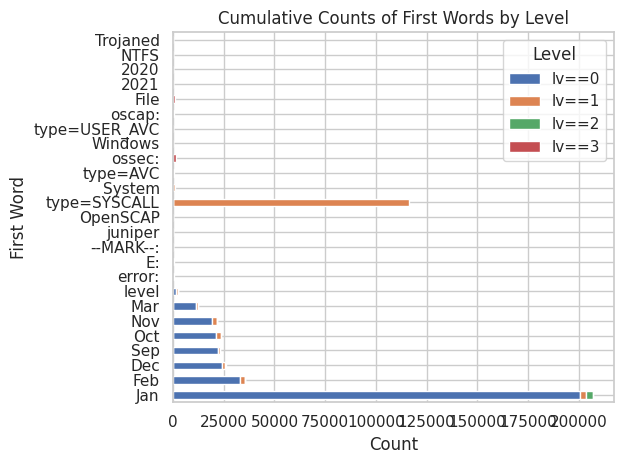

In [37]:
import matplotlib.pyplot as plt

# Assuming 'first_strings' is your DataFrame and the first column contains the 'First Word' values.
# Set the first column as the index if it's not already. Replace 'first_column_name' with the actual name of the first column.
first_strings = first_strings.set_index('full_log')  # Replace 'first_column_name' with your column name

# Now, plotting the cumulative horizontal bar chart.
first_strings.plot(kind='barh', stacked=True)  # Using 'barh' for horizontal bars, stacked=True makes it cumulative
plt.title('Cumulative Counts of First Words by Level')
plt.ylabel('First Word')  # This now correctly refers to the index of your DataFrame, which contains the first words.
plt.xlabel('Count')
plt.legend(title='Level')
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()


In [38]:
# level 0 and the other
level_0 = df_merge.loc[df_merge['level'] == 0, 'full_log'].apply(lambda x: x.split(' ')[0]).value_counts().rename('lv==0')
level_non0 = df_merge.loc[df_merge['level'] != 0, 'full_log'].apply(lambda x: x.split(' ')[0]).value_counts().rename('lv!=1')

# Merging the Series into one DataFrame
first_strings2 = pd.concat([level_0, level_non0], axis=1).fillna(0).astype(int)
first_strings2.reset_index(inplace = True)

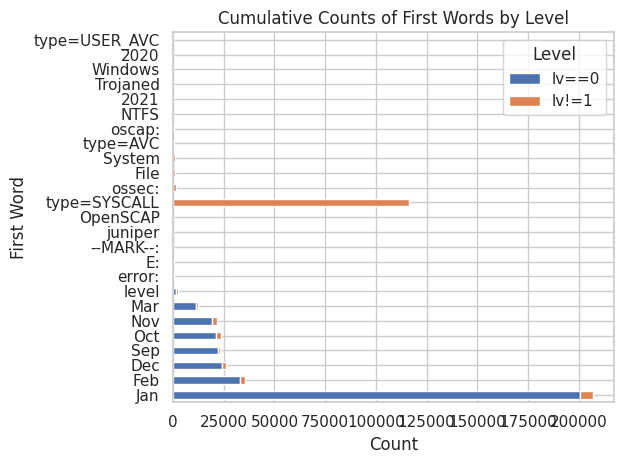

In [40]:
first_strings2 = first_strings2.set_index('full_log')  # Replace 'first_column_name' with your column name

# Now, plotting the cumulative horizontal bar chart.
first_strings2.plot(kind='barh', stacked=True)  # Using 'barh' for horizontal bars, stacked=True makes it cumulative
plt.title('Cumulative Counts of First Words by Level')
plt.ylabel('First Word')  # This now correctly refers to the index of your DataFrame, which contains the first words.
plt.xlabel('Count')
plt.legend(title='Level')
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

# 3) 

In [41]:
from collections import Counter
import re

# Function to clean and tokenize words from a string
def clean_and_tokenize(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the words
    tokens = text.split()
    # Lowercase all tokens
    tokens = [token.lower() for token in tokens]
    return tokens

# Apply the function to each full_log and aggregate the results by risk level
word_counts_by_level = df_merge.groupby('level')['full_log'].apply(
    lambda x: Counter([word for item in x for word in clean_and_tokenize(item)])
)

word_counts_by_level


level                                                                  
0      sep                                                                  22392.0
       24                                                                   36652.0
       100222                                                                   4.0
       localhost                                                           331870.0
       kibana                                                              170242.0
                                                                             ...   
3      f664f32deb735cdafc597fda3937d1cabae4174773135256af0b068171df5c61         1.0
       721ed702b9ba31e6da2667c50f3932228c337b0192bd3b8dcb72c2570e72c3e2         1.0
       133611                                                                   1.0
       138191424                                                                1.0
       141773393                                                                1.0
Name

In [45]:
pd.DataFrame(word_counts_by_level)

full_log
level                                                             
0     sep                                                  22392.0
      24                                                   36652.0
      100222                                                   4.0
      localhost                                           331870.0
      kibana                                              170242.0
...                                                            ...
3     f664f32deb735cdafc597fda3937d1cabae417477313525...       1.0
      721ed702b9ba31e6da2667c50f3932228c337b0192bd3b8...       1.0
      133611                                                   1.0
      138191424                                                1.0
      141773393                                                1.0

[2332640 rows x 1 columns]

### 4. Identical log Exists for the different label

In [46]:
# Find rows with the same 'full_log' but different 'level'
duplicate_full_logs = df_merge.groupby('full_log').filter(lambda x: len(x['level'].unique()) > 1)

# Check if there are any such rows
duplicate_full_logs_exist = not duplicate_full_logs.empty

duplicate_full_logs_exist, len(duplicate_full_logs) if duplicate_full_logs_exist else "No duplicates"


(True, 1084)

In [62]:
print(duplicate_full_logs.full_log.iloc[1])

level : 5, log : Error getting class usage statistics for interface interface-name.unit-id: error-message


In [64]:
duplicate_full_logs[duplicate_full_logs['full_log'] == 'level : 5, log : No mode specified for interface device interface-name; defaulting to port mode']

,level,full_log
396,0,"level : 5, log : No mode specified for interfa..."
441409,1,"level : 5, log : No mode specified for interfa..."
443115,1,"level : 5, log : No mode specified for interfa..."


In [65]:
# Count the number of unique entries with the same 'full_log' but different 'levels'
unique_duplicate_entries_count = duplicate_full_logs['full_log'].nunique()
unique_duplicate_entries_count # 총 337개의 log가 다중의 true label을 갖고 있음.

337

In [66]:
# Remove these duplicate entries from the merged dataset
cleaned_dataset = df_merge.drop(duplicate_full_logs.index) # 중복된 애들 처리 후 남은 애 (1084개 중복처리로 삭제)
cleaned_dataset

,level,full_log
0,0,"Sep 24 10:02:22 localhost kibana: {""type"":""err..."
1,0,Feb 8 16:21:00 localhost logstash: [2021-02-0...
2,0,"Jan 13 01:50:40 localhost kibana: {""type"":""err..."
3,0,"Jan 4 10:18:31 localhost kibana: {""type"":""err..."
4,0,"Jan 22 06:28:59 localhost kibana: {""type"":""err..."
...,...,...
472937,3,ossec: output: 'netstat listening ports':\ntcp...
472938,3,ossec: output: 'netstat listening ports':\ntcp...
472939,3,File '/var/esild/etc/ossec.conf' checksum chan...
472940,3,ossec: output: 'netstat listening ports':\ntcp...
